# Processing Time Influence on FWF

In this notebook, we dive deeper into the influence of the processing time onto the Flank Wear Failure (FWF) prediction.

This way, it is possible to understand if the dataset provides the necessary data to evaluate the drilling processes throught the evolution of time, or if it should only depend on other parameters.

Hypothesis: Since the Feature Importance did not show great value for "Processing Time", it is expected that this will not play a bigg role on FWF prediction. Additionally, it is know that processing time for drilling are usually consistent and constant for any parameters choices.

In [ ]:
"""
Software Lab 2025 Group 25

File made by: Eduardo Silva (03805057)
eduardo.silva@tum.de
"""

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# load dataset
file_path = r"XAI_Drilling_Dataset.csv"
df = pd.read_csv(file_path)

# create variables for Torque and for Torque / Feed
df['Torque'] = (9550 * df['Power Pc [kW]']) / df['Spindle speed n [1/min]']
df['Tf'] = df['Torque'] / df['Feed f [mm/rev]']
material_hardness = {'N': 70, 'P': 180, 'K': 160}
df['Hardness'] = df['Material'].map(material_hardness)
df.head()
    
    

,ID,Cutting speed vc [m/min],Spindle speed n [1/min],Feed f [mm/rev],Feed rate vf [mm/min],Power Pc [kW],Cooling [%],Material,Drill Bit Type,Process Time [sec],Main Failure,BEF,CCF,FWF,WDF,Torque,Tf,Hardness
0,1,29.92,794,0.218,173,194.87,75,N,W,19.26,0,0,0,0,0,2343.839421,10751.556975,70
1,2,29.85,792,0.241,191,214.71,75,N,W,19.55,0,0,0,0,0,2588.990530,10742.699296,70
2,3,22.85,606,0.183,111,95.68,50,P,N,36.16,0,0,0,0,0,1507.828383,8239.499360,180
3,4,29.60,785,0.236,237,206.93,75,N,W,21.22,1,0,0,1,0,2517.428662,10667.070603,70
4,5,17.43,462,0.246,114,74.85,50,K,H,33.56,0,0,0,0,0,1547.224026,6289.528561,160


In [ ]:
df_vc = df[df['FWF'] == 1]['Cutting speed vc [m/min]'].min()
df_tf = df[df['FWF'] == 1]['Tf'].min()

# function to classify failure FWF (leading to degradation of drilling)
# return 0 -> no degradation
# return 1 -> degradation in drilling
# return 2 -> failure of drilling flank
def classify_zone(row):
    if (row['Cutting speed vc [m/min]'] <= df_vc) or (row['Tf'] <= df_tf):
        return 2
    elif row['FWF'] == 1:
        return 2
    elif row['FWF'] == 0 and row['Main Failure'] == 1:
        return 1
    else:
        return 0

# create new variable to characterize failures
df['Zone_3Class'] = df.apply(classify_zone, axis=1)

/tmp/ipykernel_2947/605665398.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


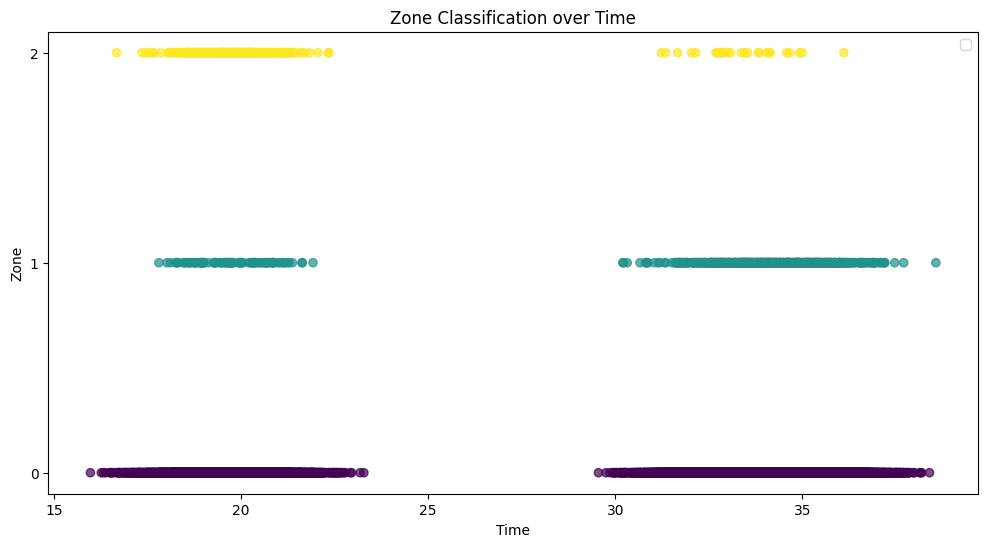

In [ ]:
import matplotlib.pyplot as plt

# plot results
plt.figure(figsize=(12,6))
plt.scatter(df["Process Time [sec]"], df["Zone_3Class"], c=df["Zone_3Class"], cmap="viridis", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Zone")
plt.title("Zone Classification over Time")
plt.yticks([0,1,2])
plt.legend()
plt.show()

As seen above, the different classification of zones (0, 1, 2) are spaned through very similar intervals of time of drilling. 
This (together with the results from feature importance) show once again that the processing time of the drilling experiment are not relevant for the flank wear degradation. 

Rather, given that all processes usually take between 15 and 30 seconds, it has been already shown that it is more important to consider which values are used for Feed rate and for Cutting speed. 